In [1]:
import dask.dataframe as dd
import pandas as pd
import pyarrow
import matplotlib.pyplot as plt

In [6]:
df = dd.read_csv(
    "filtered_tweets.csv",
    dtype=str,            # Cast all columns to string to avoid parsing issues
    on_bad_lines='skip',  # Skip lines with errors
    assume_missing=True    # Helps if columns have mixed types
)
df.head()

,tweetId,createdAtDateTweet,createdAtTimeTweet,language,likes,place,withheldCountries,retweetCount,isRetweet,isReply,isQuote,userLabels,userFollowers,userVerified,userLocation,tweetText
0,1424740184260808711,2021-08-09,16:31:44,en,1,NONE,NONE,0,false,true,false,[BLOGGER],4547,false,Mali,@Brindiii_ 100% naturelle
1,1515728987506495492,2022-04-17,18:28:46,und,1,NONE,NONE,0,false,true,false,[BLOGGER],4547,false,Mali,@tahiroubouba RIP
2,1383377227954343943,2021-04-17,13:10:07,und,0,NONE,NONE,0,false,true,false,[BLOGGER],4547,false,Mali,@PetitSaitama @Magicknup @TechItValley @EricBL...
3,1415404241263362054,2021-07-14,22:14:02,und,0,NONE,NONE,0,false,true,false,[BLOGGER],4547,false,Mali,@Brahimmock Jfb
4,1390000929127104513,2021-05-05,19:50:21,fr,1,NONE,NONE,0,false,true,false,[BLOGGER],4547,false,Mali,@GoitaNafissatou Effectivement. Mais tu vas t’...


In [10]:
df_filtered_french = df[df['language'] == "fr"]
df_filtered_french.head()

,tweetId,createdAtDateTweet,createdAtTimeTweet,language,likes,place,withheldCountries,retweetCount,isRetweet,isReply,isQuote,userLabels,userFollowers,userVerified,userLocation,tweetText
4,1390000929127104513,2021-05-05,19:50:21,fr,1,NONE,NONE,0,false,true,false,[BLOGGER],4547,false,Mali,@GoitaNafissatou Effectivement. Mais tu vas t’...
6,1353626202368577543,2021-01-25,09:50:10,fr,0,NONE,NONE,NONE,true,false,false,[BLOGGER],4547,false,Mali,RT @PNUDMALI: Le @PNUDMALI avec @YagtuOng a te...
7,1435135632788045831,2021-09-07,08:59:33,fr,0,NONE,NONE,0,false,true,false,[BLOGGER],4547,false,Mali,@CuiBeau Chaque jour 2 fois
8,1398029653357510660,2021-05-27,23:33:38,fr,1,NONE,NONE,0,false,true,false,[BLOGGER],4547,false,Mali,@OwnIsHope C’est quoi le projet?
9,1390001023276703748,2021-05-05,19:50:43,fr,1,NONE,NONE,0,false,true,false,[BLOGGER],4547,false,Mali,@GoitaNafissatou Sois la bienvenue parmi nous


/home/azzaosman/.local/lib/python3.10/site-packages/dask/_task_spec.py:741: FutureWarning: Operation between non boolean Series with different indexes will no longer return a boolean result in a future version. Cast both Series to object type to maintain the prior behavior.
  return self.func(*new_argspec)
/home/azzaosman/.local/lib/python3.10/site-packages/dask/_task_spec.py:741: FutureWarning: Operation between non boolean Series with different indexes will no longer return a boolean result in a future version. Cast both Series to object type to maintain the prior behavior.
  return self.func(*new_argspec)
/home/azzaosman/.local/lib/python3.10/site-packages/dask/_task_spec.py:741: FutureWarning: Operation between non boolean Series with different indexes will no longer return a boolean result in a future version. Cast both Series to object type to maintain the prior behavior.
  return self.func(*new_argspec)
/home/azzaosman/.local/lib/python3.10/site-packages/dask/_task_spec.py:741: 

1051179


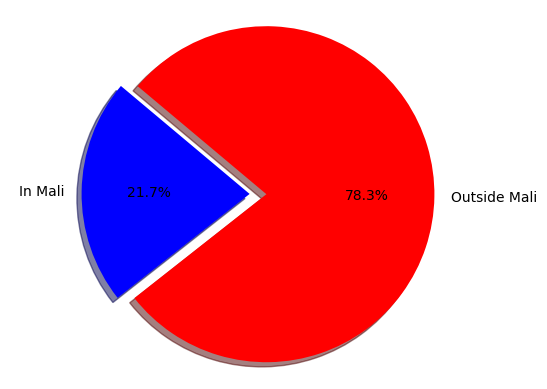

/home/azzaosman/.local/lib/python3.10/site-packages/dask/dataframe/dask_expr/_expr.py:1470: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  return get_meta_library(args[0]).to_datetime(*args, **kwargs)
/home/azzaosman/.local/lib/python3.10/site-packages/dask/dataframe/dask_expr/_expr.py:1470: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  return get_meta_library(args[0]).to_datetime(*args, **kwargs)
/home/azzaosman/.local/lib/python3.10/site-packages/dask/dataframe/dask_expr/_expr.py:1470: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  return get_meta_library(args[0]).to_dateti

In [11]:
number_of_authors_in_Mali = df_filtered_french[df_filtered_french["userLocation"].str.contains('Mali')].shape[0].compute()
print(number_of_authors_in_Mali)

#Plotting number of people in Mali vs number of people outside (Pie chart)
labels = 'In Mali', 'Outside Mali'
sizes = [number_of_authors_in_Mali, df.shape[0].compute()-number_of_authors_in_Mali]
colors = ['blue', 'red']
explode = (0.1, 0)  # explode 1st slice
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()


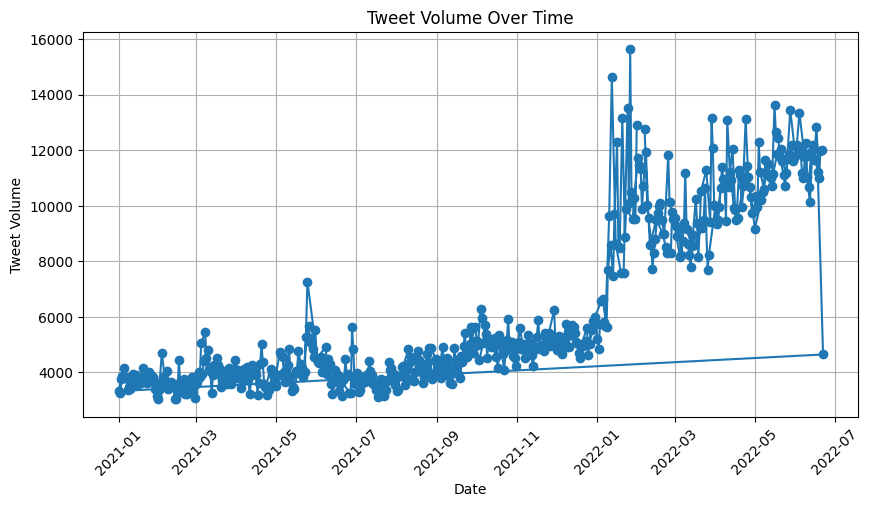

In [13]:
df_filtered_french['createdAtDateTweet'] = dd.to_datetime(df_filtered_french['createdAtDateTweet'], errors='coerce')
df_filtered_french['createdAtTimeTweet'] = dd.to_datetime(df_filtered_french['createdAtTimeTweet'], errors='coerce')
tweet_volume = df_filtered_french.groupby(df_filtered_french['createdAtDateTweet'].dt.date).size().compute()
plt.figure(figsize=(10, 5))
plt.plot(tweet_volume.index, tweet_volume.values, marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Tweet Volume')
plt.title('Tweet Volume Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
# total_tweets = df_filtered_french['tweetId'].nunique().compute()
# print(f"Total number of tweets: {total_tweets}")

hour
2     104654
3      66020
7      49783
12    167164
13    177361
20    183226
21    203688
22    224272
0     194737
1     151859
4      41745
5      32566
6      35764
8      70315
9      95424
10    124373
11    148323
14    173947
15    170477
16    166724
17    167177
18    172919
19    176355
23    229768
dtype: int64
day
2021-01-02     3259
2021-01-05     4152
2021-01-06     3798
2021-01-07     3840
2021-01-08     3378
              ...  
2022-06-15    11634
2022-06-17    12818
2022-06-19    10988
2022-06-20    11985
2022-06-21    12000
Length: 538, dtype: int64


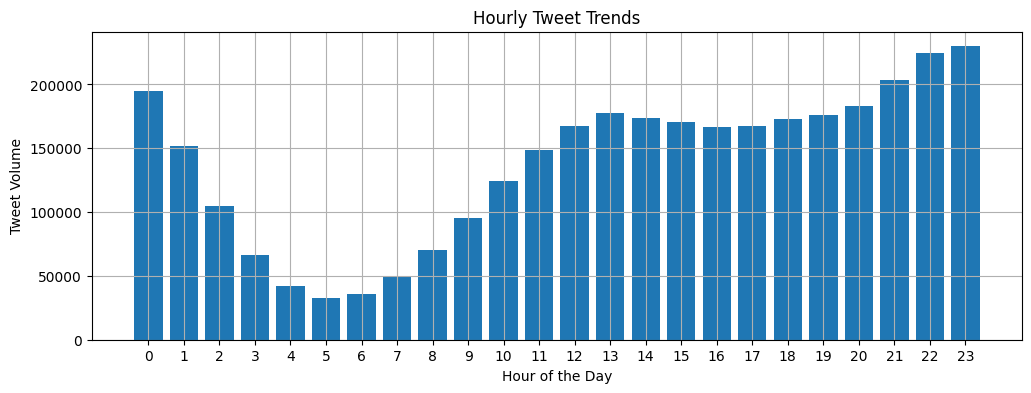

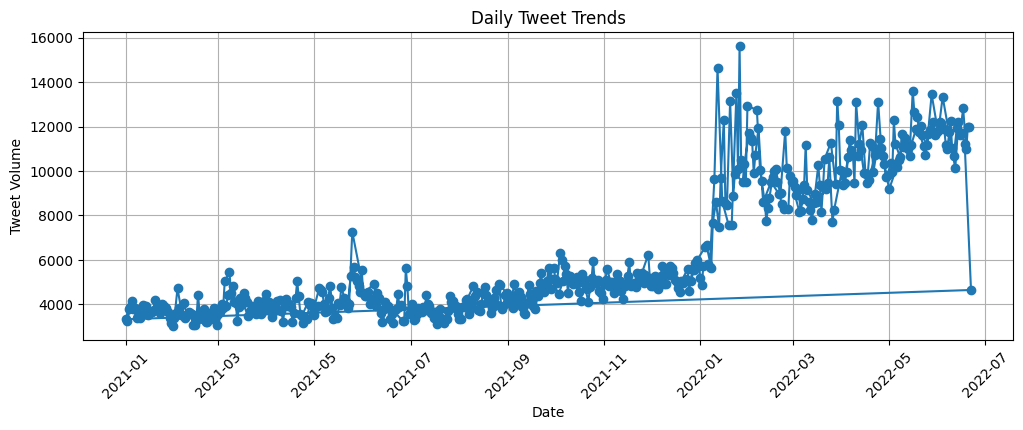

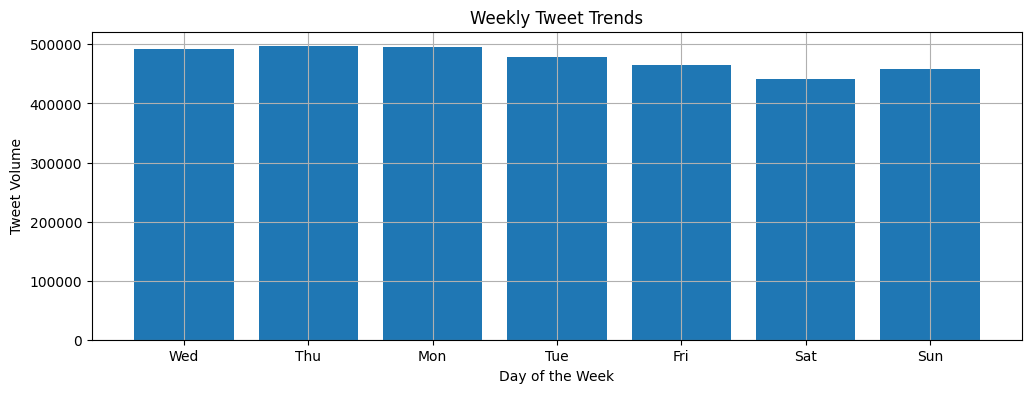

In [14]:
# Extract temporal components (assuming you use Dask properly for further processing)
df_filtered_french['hour'] = df_filtered_french['createdAtTimeTweet'].dt.hour
df_filtered_french['day'] = df_filtered_french['createdAtDateTweet'].dt.date
df_filtered_french['weekday'] = df_filtered_french['createdAtDateTweet'].dt.weekday  # 0 = Monday, 6 = Sunday

# Compute tweet volume per hour
hourly_trend = df_filtered_french.groupby('hour').size().compute()
print(hourly_trend)

# Compute tweet volume per day
daily_trend = df_filtered_french.groupby('day').size().compute()
print(daily_trend)

# Compute tweet volume per weekday
weekly_trend = df_filtered_french.groupby('weekday').size().compute()

# Plot hourly trends (Bar chart)
plt.figure(figsize=(12, 4))
plt.bar(hourly_trend.index, hourly_trend.values)
plt.xlabel('Hour of the Day')
plt.ylabel('Tweet Volume')
plt.title('Hourly Tweet Trends')
plt.grid(True)
plt.xticks(range(0, 24))  # Ensure the x-axis shows 0 to 23 hours
plt.show()

# Plot daily trends (Line chart)
plt.figure(figsize=(12, 4))
plt.plot(daily_trend.index, daily_trend.values, marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Tweet Volume')
plt.title('Daily Tweet Trends')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Plot weekly trends (Bar chart)
plt.figure(figsize=(12, 4))
plt.bar(weekly_trend.index, weekly_trend.values, tick_label=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'],)
plt.xlabel('Day of the Week')
plt.ylabel('Tweet Volume')
plt.title('Weekly Tweet Trends')
plt.grid(True)
plt.show()


In [15]:
# df_filtered_french['likes'] = df['likes'].map_partitions(pd.to_numeric, errors='coerce').fillna(0)
df_filtered_french['retweetCount'] = df_filtered_french['retweetCount'].map_partitions(pd.to_numeric, errors='coerce').fillna(0)

# Find the top 10 most retweeted tweets
top_retweeted = df_filtered_french.nlargest(10, 'retweetCount')[['tweetText', 'retweetCount']].compute()

# Display results
print("Top 10 Most Retweeted Tweets:")
pd.set_option('display.max_colwidth', None)
display(top_retweeted)


Top 10 Most Retweeted Tweets:


,tweetText,retweetCount
9751,Y’a un tipeu il a dit au coiffeur « tu m’as raté » la génération de fou qui arrive J’ai 150 ans j’ai jamais osé,16104
158550,Aux 666 ressortissants français résidant au Sénégal qui ont voté Le Pen ou Zemmour: pourquoi ne rentrez-vous pas en France? Chacun est libre de ses idées mais il faut être cohérent: quand on ne veut pas d'immigration chez soi on évite d'être un immigré chez les autres.,10634
10543,Un simple regard à la mauvaise personne et tout est mort https://t.co/ugFyNW3CHb,9477
202962,Face ID obligatoire pour éteindre sous iOS 15… Ah chers voleurs on aura le temps de vous localiser et d’aller manger vos morts et reprendre nos iPhones 🤌🏾 Unbelievable.. https://t.co/xbGjOni8nV,9170
298126,Au nom de dieu commencez à parler français vous croyez on est à San Francisco ou quoi https://t.co/yOOcfJQkNV,8582
57981,les infirmières méchantes c mieux elles démissionnent frchmt je comprends pas cmt tu peux faire ce métier et être mauvaise,6928
115674,Là le respect est mort et enterré! https://t.co/S97xIQwIcr,6444
290524,Mdr le renoie est-ce qu’il comprend l’anglais ? https://t.co/bC1n2TTQZb,6351
165755,Pour toi Ari repose en paix 🦅🙏🏿🇦🇱 https://t.co/ggqlQXwTZs,5929
107660,les 20 degrés c'est pour quand du coup ? jusqu'à mon frère il a acheté des merguez wsh,5511
